<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.793339,49.637624,-2040.978855,-1914.547892,-263.863722,-1650.684170
1,0.0,1.0,76.491763,86.036571,5087.890165,5260.418499,930.776124,4329.642375
2,0.0,2.0,58.697152,22.728517,443.938529,535.364198,-1137.997935,1673.362133
3,0.0,3.0,39.330387,41.695603,1341.617201,1432.643192,-277.103075,1709.746267
4,0.0,4.0,21.941120,92.900970,-5279.804373,-5154.962283,1706.421937,-6861.384220
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.024866,30.080372,721.748333,785.853571,1277.052777,-491.199206
119996,999.0,116.0,41.529498,93.797773,-647.528510,-502.201239,213.164917,-715.366156
119997,999.0,117.0,29.801254,59.660408,-1973.701806,-1874.240144,840.972539,-2715.212683
119998,999.0,118.0,33.762673,57.552103,3123.653913,3224.968689,764.458826,2460.509863


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    66.793339  49.637624 -2040.978855 -1914.547892  -263.863722   
      1.0    76.491763  86.036571  5087.890165  5260.418499   930.776124   
      2.0    58.697152  22.728517   443.938529   535.364198 -1137.997935   
      3.0    39.330387  41.695603  1341.617201  1432.643192  -277.103075   
      4.0    21.941120  92.900970 -5279.804373 -5154.962283  1706.421937   
...                ...        ...          ...          ...          ...   
999.0 115.0  24.024866  30.080372   721.748333   785.853571  1277.052777   
      116.0  41.529498  93.797773  -647.528510  -502.201239   213.164917   
      117.0  29.801254  59.660408 -1973.701806 -1874.240144   840.972539   
      118.0  33.762673  57.552103  3123.653913  3224.968689   764.458826   
      119.0  56.330039  79.428260  5948.712014  6094.470313    -8.182137   

                   e_hat  
rep   index               
0.0   0.0   -1650.684170  
      1.0    4329.642375  
      2.0    1673.362133  
      3.0    1709.746267  
      4.0   -6861.384220  
...                  ...  
999.0 115.0  -491.199206  
      116.0  -715.366156  
      117.0 -2715.212683  
      118.0  2460.509863  
      119.0  6102.652450  

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    66.793339  49.637624 -2040.978855 -1914.547892  -263.863722   
      1.0    76.491763  86.036571  5087.890165  5260.418499   930.776124   
      2.0    58.697152  22.728517   443.938529   535.364198 -1137.997935   
      3.0    39.330387  41.695603  1341.617201  1432.643192  -277.103075   
      4.0    21.941120  92.900970 -5279.804373 -5154.962283  1706.421937   
...                ...        ...          ...          ...          ...   
999.0 115.0  24.024866  30.080372   721.748333   785.853571  1277.052777   
      116.0  41.529498  93.797773  -647.528510  -502.201239   213.164917   
      117.0  29.801254  59.660408 -1973.701806 -1874.240144   840.972539   
      118.0  33.762673  57.552103  3123.653913  3224.968689   764.458826   
      119.0  56.330039  79.428260  5948.712014  6094.470313    -8.182137   

                   e_hat  
rep   index               
0.0   0.0   -1650.684170  
      1.0    4329.642375  
      2.0    1673.362133  
      3.0    1709.746267  
      4.0   -6861.384220  
...                  ...  
999.0 115.0  -491.199206  
      116.0  -715.366156  
      117.0 -2715.212683  
      118.0  2460.509863  
      119.0  6102.652450  

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,66.793339,49.637624,-2040.978855,-1914.547892,-263.863722,-1650.684170
1,0.0,1.0,76.491763,86.036571,5087.890165,5260.418499,930.776124,4329.642375
2,0.0,2.0,58.697152,22.728517,443.938529,535.364198,-1137.997935,1673.362133
3,0.0,3.0,39.330387,41.695603,1341.617201,1432.643192,-277.103075,1709.746267
4,0.0,4.0,21.941120,92.900970,-5279.804373,-5154.962283,1706.421937,-6861.384220
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.024866,30.080372,721.748333,785.853571,1277.052777,-491.199206
119996,999.0,116.0,41.529498,93.797773,-647.528510,-502.201239,213.164917,-715.366156
119997,999.0,117.0,29.801254,59.660408,-1973.701806,-1874.240144,840.972539,-2715.212683
119998,999.0,118.0,33.762673,57.552103,3123.653913,3224.968689,764.458826,2460.509863


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    66.793339  49.637624 -2040.978855 -1914.547892  -263.863722   
      1.0    76.491763  86.036571  5087.890165  5260.418499   930.776124   
      2.0    58.697152  22.728517   443.938529   535.364198 -1137.997935   
      3.0    39.330387  41.695603  1341.617201  1432.643192  -277.103075   
      4.0    21.941120  92.900970 -5279.804373 -5154.962283  1706.421937   
...                ...        ...          ...          ...          ...   
999.0 115.0  24.024866  30.080372   721.748333   785.853571  1277.052777   
      116.0  41.529498  93.797773  -647.528510  -502.201239   213.164917   
      117.0  29.801254  59.660408 -1973.701806 -1874.240144   840.972539   
      118.0  33.762673  57.552103  3123.653913  3224.968689   764.458826   
      119.0  56.330039  79.428260  5948.712014  6094.470313    -8.182137   

                   e_hat  
rep   index               
0.0   0.0   -1650.684170  
      1.0    4329.642375  
      2.0    1673.362133  
      3.0    1709.746267  
      4.0   -6861.384220  
...                  ...  
999.0 115.0  -491.199206  
      116.0  -715.366156  
      117.0 -2715.212683  
      118.0  2460.509863  
      119.0  6102.652450  

[120000 rows x 6 columns]

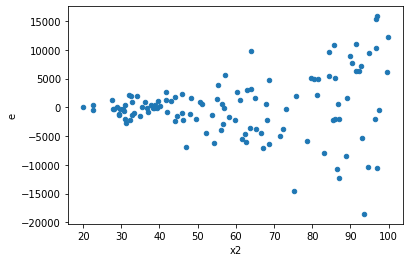

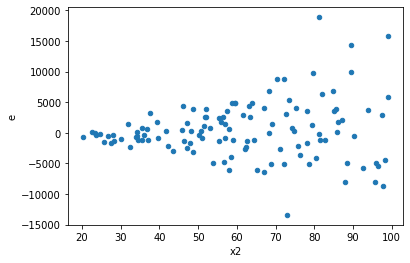

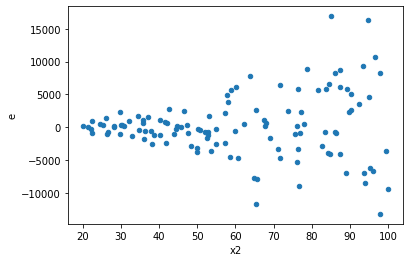

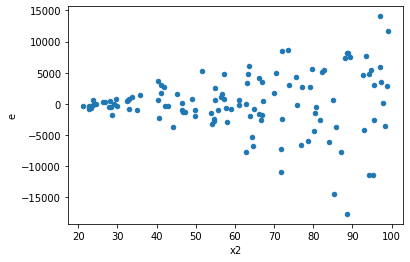

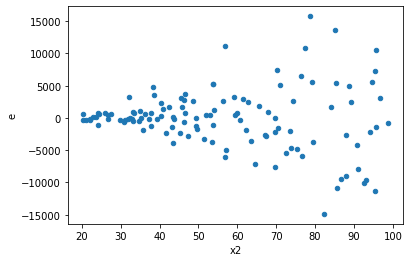

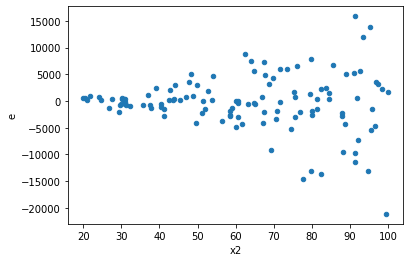

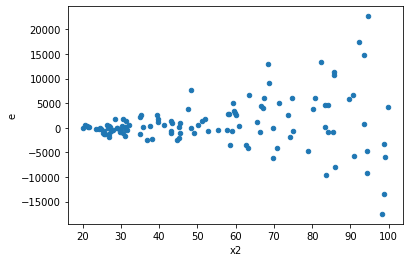

In [16]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[3.0]
tablenew3 = table.loc[5.0]
tablenew4 = table.loc[6.0]
tablenew5 = table.loc[7.0]
tablenew6 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,71.0,45.0,1019348926.7529768,1359962855.6054833,14357027.13736587,30221396.791232962,2.1049898772273115,0.008557205355318898,0.9957213973223406,0.004278602677659449,Reject001=0 : Heteroscedasticity
4.0,63.0,53.0,1010357165.4709578,991105397.2867717,16037415.324935837,18700101.835599463,1.1660296535766295,0.5679533455408254,0.7160233272295873,0.2839766727704127,Reject001=1 : Homoscedasticity
8.0,55.0,61.0,1223497236.9761176,1501654313.9369063,22245404.308656685,24617283.835031252,1.1066233498597984,0.6977105642236432,0.6511447178881784,0.3488552821118216,Reject001=1 : Homoscedasticity
9.0,71.0,45.0,296351130.742619,2752418366.596393,4173959.587924211,61164852.591030955,14.653915856777472,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
13.0,57.0,59.0,641438392.3479679,2793499393.0324364,11253305.128911717,47347447.33953282,4.2074258892961955,1.452391882317272e-07,0.9999999273804059,7.26195941158636e-08,Reject001=0 : Heteroscedasticity
14.0,57.0,59.0,408244320.5072184,2932033225.183905,7162181.061530148,49695478.39294755,6.938595654873108,5.142108960853875e-12,0.999999999997429,2.5710544804269375e-12,Reject001=0 : Heteroscedasticity
15.0,51.0,65.0,194819409.92794743,2836469259.450273,3819988.4299597535,43637988.606927276,11.423591826791746,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
16.0,49.0,67.0,307403535.31086373,2714070753.954726,6273541.5369564025,40508518.715742186,6.457041605146496,6.815215058963986e-12,0.9999999999965924,3.407607529481993e-12,Reject001=0 : Heteroscedasticity
18.0,58.0,58.0,428525147.81483054,1883873114.5100935,7388364.617497078,32480570.939829197,4.396178670298555,7.193470286104287e-08,0.9999999640326486,3.596735143052143e-08,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,52.0,64.0,2844635571.759471,450908834.84578115,54704530.22614367,7045450.54446533,0.12879098888775872,3.1044352512190006e-12,Reject001=0 : Heteroscedasticity
1.0,64.0,52.0,2209447373.825355,306091176.76622653,34522615.21602117,5886368.783965895,0.17050761499766573,9.073523588809357e-11,Reject001=0 : Heteroscedasticity
2.0,56.0,60.0,1325958179.029513,1287895551.4579182,23677824.625527017,21464925.85763197,0.9065412974843422,0.7125118103297576,Reject001=1 : Homoscedasticity
3.0,71.0,45.0,1019348926.7529768,1359962855.6054833,14357027.13736587,30221396.791232962,2.1049898772273115,0.008557205355318898,Reject001=0 : Heteroscedasticity
4.0,63.0,53.0,1010357165.4709578,991105397.2867717,16037415.324935837,18700101.835599463,1.1660296535766295,0.5679533455408254,Reject001=1 : Homoscedasticity
5.0,60.0,56.0,2400216100.554453,183418909.56050962,40003601.675907545,3275337.670723386,0.08187606949141236,4.9486245476578356e-18,Reject001=0 : Heteroscedasticity
6.0,45.0,71.0,1961178492.6954594,629398540.8676414,43581744.282121316,8864768.181234386,0.20340553888456936,1.0204476843421824e-07,Reject001=0 : Heteroscedasticity
7.0,47.0,69.0,1963631636.9535222,1118461104.3996606,41779396.530926004,16209581.223183487,0.3879802622612035,0.0008045333093331097,Reject001=0 : Heteroscedasticity
8.0,55.0,61.0,1223497236.9761176,1501654313.9369063,22245404.308656685,24617283.835031252,1.1066233498597984,0.6977105642236432,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    758
Reject001=1 : Homoscedasticity      242
Name: Result_test, dtype: int64